In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("train.csv")
# df.head()
train_label = df["label"]
train_image = df.drop("label", axis = 1)

In [3]:
train_image, test_image, train_label, test_label = train_test_split(
    train_image, train_label, test_size=0.2, random_state=42)

In [4]:
train_image = tf.reshape(train_image, [33600, 28 ,28]).numpy()
test_image = tf.reshape(test_image, [8400, 28 ,28]).numpy()

In [5]:
train_label = np.array(train_label)
test_label = np.array(test_label)

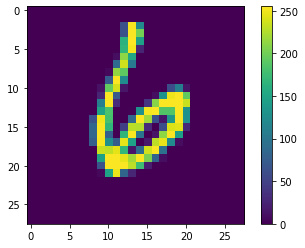

In [6]:
plt.figure()
plt.imshow(train_image[0])
plt.colorbar()
plt.grid(False)
plt.show()

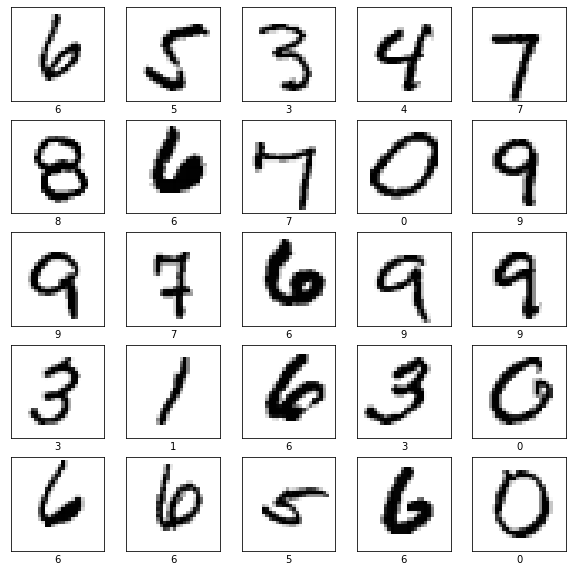

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i], cmap=plt.cm.binary)
    plt.xlabel(train_label[i])
plt.show()

In [8]:
es = EarlyStopping(monitor='accuracy', mode='min', verbose=1, patience=5, min_delta=0.0001)

In [9]:
train_image, test_image = train_image / 255.0, test_image / 255.0
test_image = test_image.reshape(test_image.shape[0],28,28,1)
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation = "relu"),
                             tf.keras.layers.Dropout(.15, input_shape=(28,28)),
                             tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

history = model.fit(train_image, train_label, epochs=20, 
                    validation_data=(test_image, test_label))

Epoch 1/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.5797 - accuracy: 0.8304 - val_loss: 0.1956 - val_accuracy: 0.9433
Epoch 2/20
1050/1050 [==============================] - 1s 805us/step - loss: 0.1835 - accuracy: 0.9476 - val_loss: 0.1410 - val_accuracy: 0.9576
Epoch 3/20
1050/1050 [==============================] - 1s 818us/step - loss: 0.1303 - accuracy: 0.9615 - val_loss: 0.1220 - val_accuracy: 0.9631
Epoch 4/20
1050/1050 [==============================] - 1s 833us/step - loss: 0.1012 - accuracy: 0.9707 - val_loss: 0.1165 - val_accuracy: 0.9654
Epoch 5/20
1050/1050 [==============================] - 1s 830us/step - loss: 0.0829 - accuracy: 0.9747 - val_loss: 0.1083 - val_accuracy: 0.9688
Epoch 6/20
1050/1050 [==============================] - 1s 840us/step - loss: 0.0672 - accuracy: 0.9789 - val_loss: 0.0946 - val_accuracy: 0.9704
Epoch 7/20
1050/1050 [==============================] - 1s 807us/step - loss: 0.0540 - accuracy: 0.9828 - val_loss: 0.0914 - v

In [11]:
# model.fit(train_image,train_label, epochs=20, callbacks=[es])

In [12]:
test_loss, test_acc = model.evaluate(test_image,  test_label, verbose=2)

print('\nTest accuracy:', test_acc)


263/263 - 0s - loss: 0.0997 - accuracy: 0.9767

Test accuracy: 0.9766666889190674


263/263 - 0s - loss: 0.0997 - accuracy: 0.9767


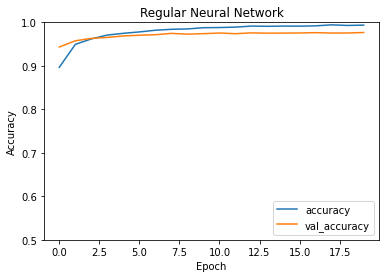

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Regular Neural Network")

test_loss, test_acc = model.evaluate(test_image,  test_label, verbose=2)


In [14]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_image)

In [15]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i].reshape(28,28)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


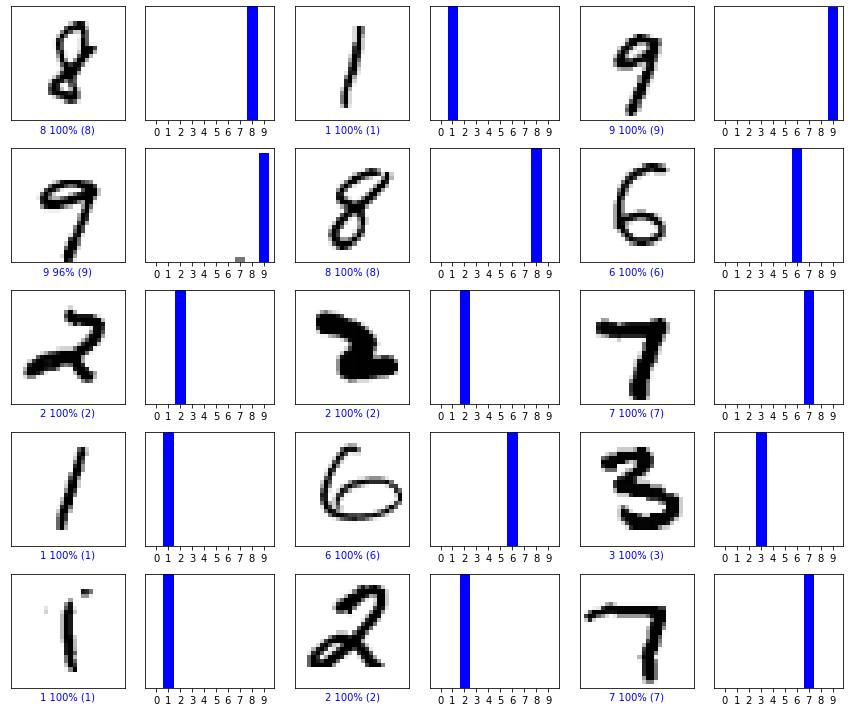

In [16]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_label)
plt.tight_layout()
plt.show()


In [17]:
train_image.shape

(33600, 28, 28)

Same dataset however this time with CNN


In [18]:
# train_image, test_image = train_image / 255.0, test_image / 255.0

In [22]:
train_image = train_image.reshape(33600,28,28,1)
test_image = test_image.reshape(test_image.shape[0],28,28,1)
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_image, train_label, epochs=20, 
                    validation_data=(test_image, test_label))


Epoch 1/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.4533 - accuracy: 0.8518 - val_loss: 0.0851 - val_accuracy: 0.9755
Epoch 2/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0610 - accuracy: 0.9805 - val_loss: 0.0499 - val_accuracy: 0.9835
Epoch 3/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0385 - accuracy: 0.9878 - val_loss: 0.0409 - val_accuracy: 0.9874
Epoch 4/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0324 - accuracy: 0.9888 - val_loss: 0.0400 - val_accuracy: 0.9873
Epoch 5/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.0479 - val_accuracy: 0.9845
Epoch 6/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0338 - val_accuracy: 0.9905
Epoch 7/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0155 - accuracy: 0.9950 - val_loss: 0.0331 - val_accuracy:

263/263 - 0s - loss: 0.0487 - accuracy: 0.9906


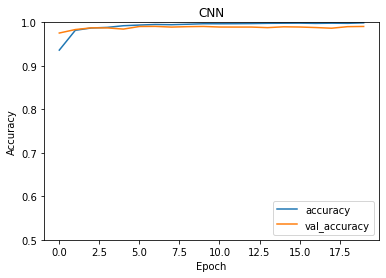

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("CNN")

test_loss, test_acc = model.evaluate(test_image,  test_label, verbose=2)


In [26]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_image)

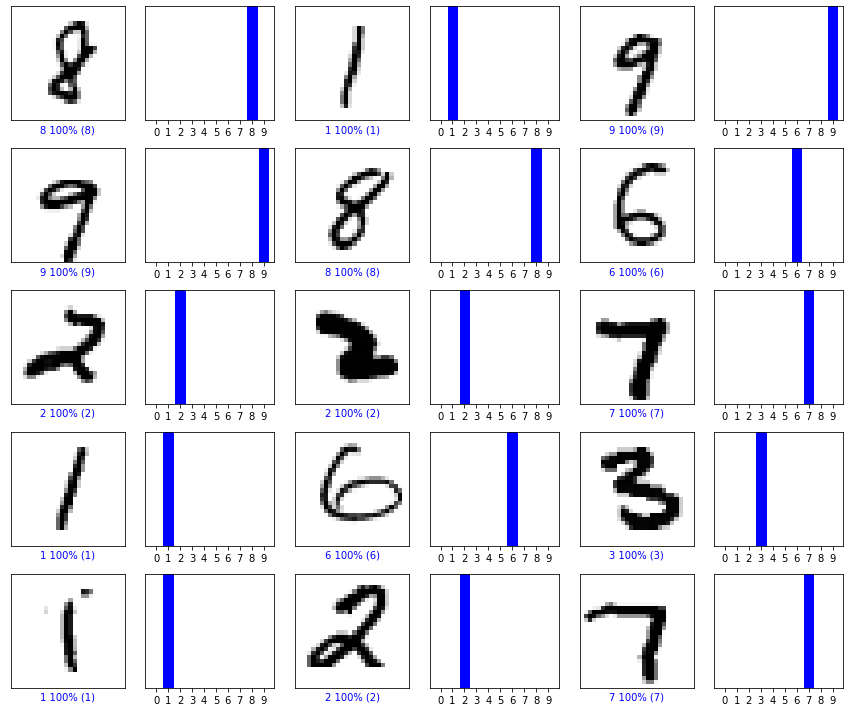

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_label)
plt.tight_layout()
plt.show()


In [ ]:
'''
In conclusion, in this case when it comes to digit recognition, the difference between 
a NN and a CNN is not very substantial. 
'''